In [79]:
# from google.colab import drive
# drive.mount('/content/drive')

In [80]:
path = r"C:\Users\82104\PythonWorkspace\Regression\final\마지막 2008년+2009+2010년 남,여 csv파일.csv"

In [81]:
# categorical 변수 제거
import pandas as pd

data = pd.read_csv(path)
# 데이터셋 로드


In [82]:
print(data.shape[1])

90


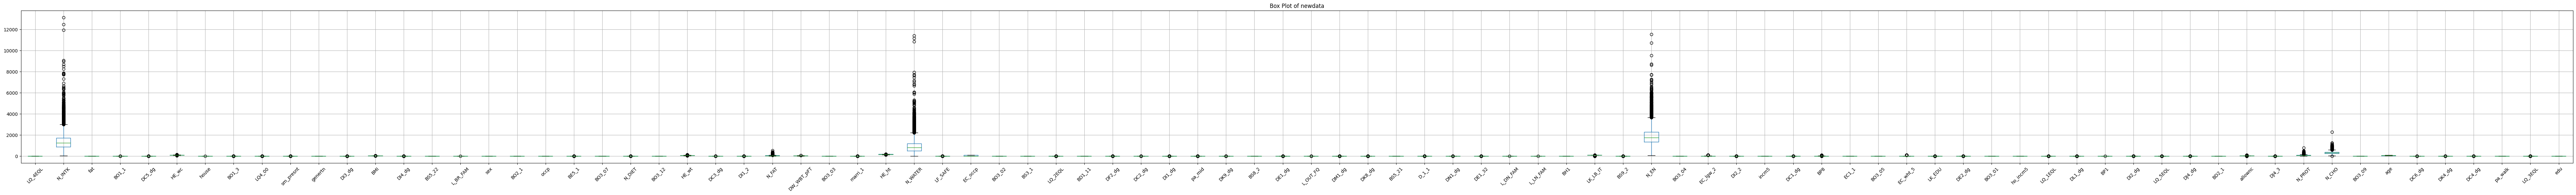

In [83]:
import matplotlib.pyplot as plt

# 이상치 확인을 위한 상자 그림(Box Plot)
plt.figure(figsize=(100 ,6))  # 그래프의 크기 설정
pd.DataFrame(data).boxplot()  # 각 열에 대한 상자 그림 생성
plt.xticks(rotation=45)  # x축 레이블 회전
plt.title('Box Plot of newdata')  # 그래프 제목 설정
plt.show()  # 그래프 출력

In [84]:
import numpy as np

# 선택한 특성들만 추출
selected_features = ['N_EN', 'N_WATER', 'N_INTK']
data_selected = data[selected_features]

# Z-점수 계산
z_scores = np.abs((data_selected- data_selected.mean()) / data_selected.std())

# 이상치로 판단할 임계값 설정 (일반적으로 3을 사용)
threshold = 3

# 이상치 탐지
outliers = np.where(np.any(z_scores > threshold, axis=1))

# 이상치가 있는 행의 인덱스 출력 (겹치는 행은 중복 제거)
outlier_rows = np.unique(outliers[0])
print("Rows with outliers:", len(outlier_rows))


Rows with outliers: 359


In [85]:
# 이상치가 있는 행들의 인덱스를 가져옴
outlier_rows = np.unique(outliers[0])

# 이상치가 있는 행들을 X 데이터프레임에서 삭제
data= data.drop(outlier_rows)


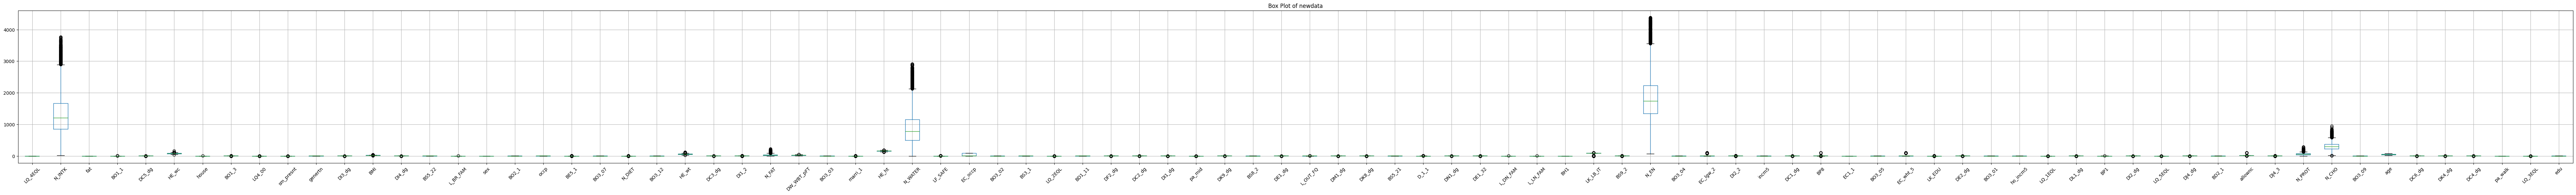

In [86]:
import matplotlib.pyplot as plt

# 이상치 확인을 위한 상자 그림(Box Plot)
plt.figure(figsize=(100 ,6))  # 그래프의 크기 설정
pd.DataFrame(data).boxplot()  # 각 열에 대한 상자 그림 생성
plt.xticks(rotation=45)  # x축 레이블 회전
plt.title('Box Plot of newdata')  # 그래프 제목 설정
plt.show()  # 그래프 출력

In [87]:
import pandas as pd

# 결측치 확인
missing_values = data.isnull().sum()

# None 값도 결측치로 처리되도록 설정
missing_values += data.apply(lambda x: x.count() if x.dtype == "O" and x == "None" else 0)

# 결측치가 있는 컬럼 출력
columns_with_missing_values = missing_values[missing_values > 0].index
print("Columns with missing values:")
print(columns_with_missing_values)


Columns with missing values:
Index([], dtype='object')


In [88]:
data.loc[:, 'fat'] = data.loc[:, 'fat'].apply(lambda x: 1 if x > 1 else 0)

data = data[['BMI', 'HE_wc', 'sex', 'N_EN', 'N_PROT', 'L_OUT_FQ', 
          'HE_ht', 'BO1_1', 'BO3_01', 'BS3_1', 'DW_WBT_pFT','fat']]

Y = data[['DW_WBT_pFT','fat','sex']]
X = data[['BMI', 'HE_wc', 'sex', 'N_EN', 'N_PROT', 'L_OUT_FQ', 
          'HE_ht', 'BO1_1', 'BO3_01', 'BS3_1']]

X(독립변수)에서만 이상치 제거

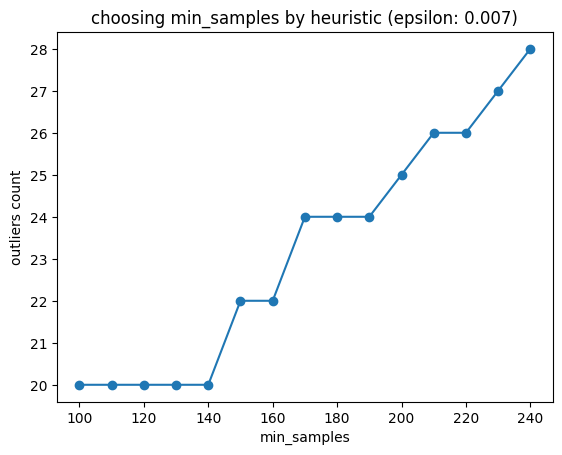

In [89]:
from sklearn.cluster import DBSCAN

epsilon = 0.007
outliers_count = {}
# newdata = pd.read_csv("./one_hot_encoded.csv")
for i in range(100,250,10):
    dbscan = DBSCAN(eps=epsilon, min_samples=i, metric='cosine')
    dbscan_labels = dbscan.fit_predict(data)
    # outlier 개수만큼 지우기.
    outliers = sum(dbscan_labels == -1) 
    outliers_count[i] = outliers



keys = outliers_count.keys()
values = outliers_count.values()

plt.title(f"choosing min_samples by heuristic (epsilon: {epsilon})")    
plt.xlabel("min_samples")
plt.ylabel("outliers count")
plt.plot(keys, values, 'o-')

plt.show()

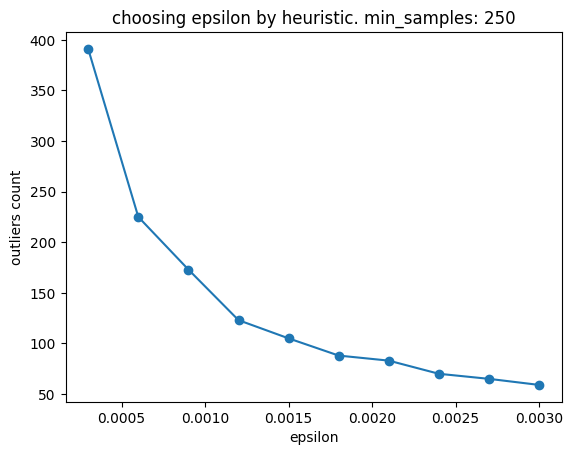

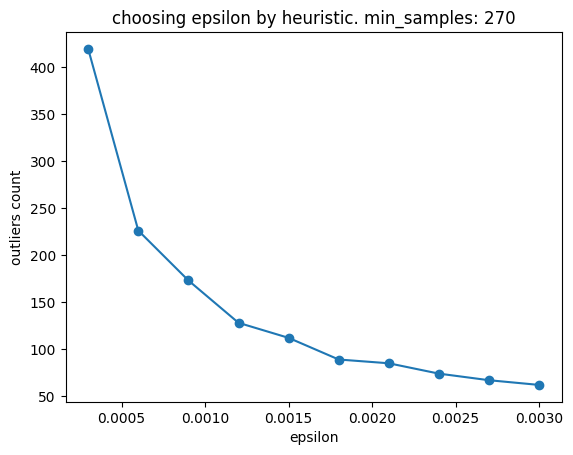

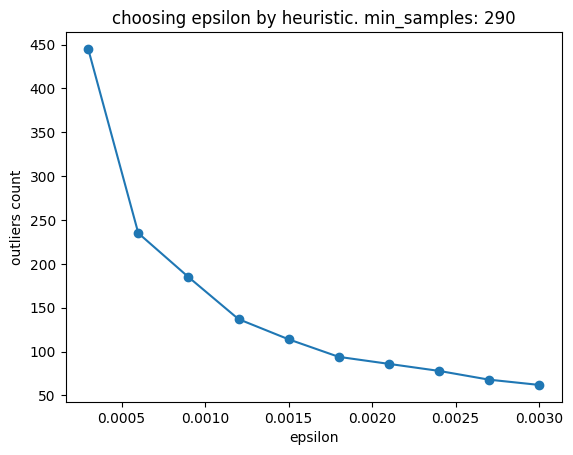

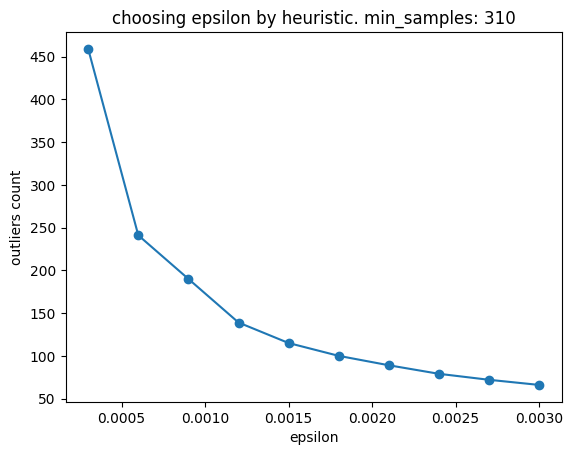

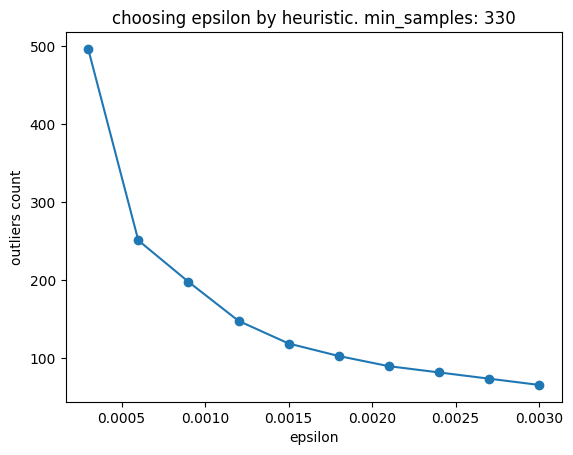

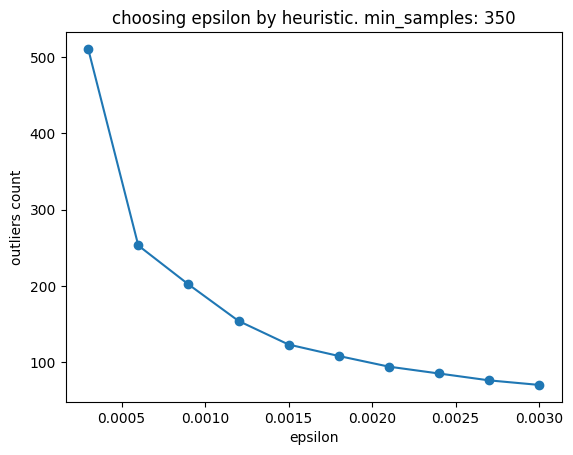

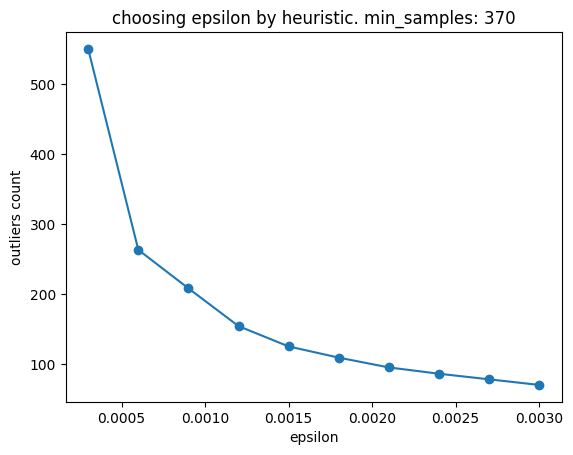

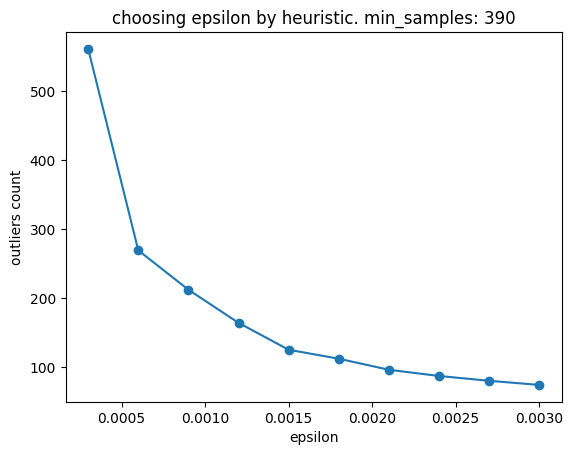

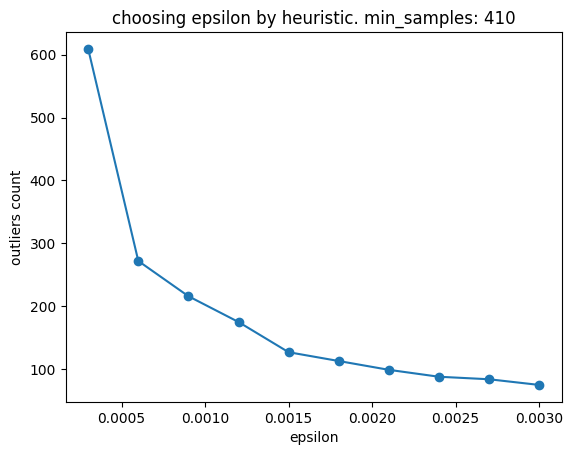

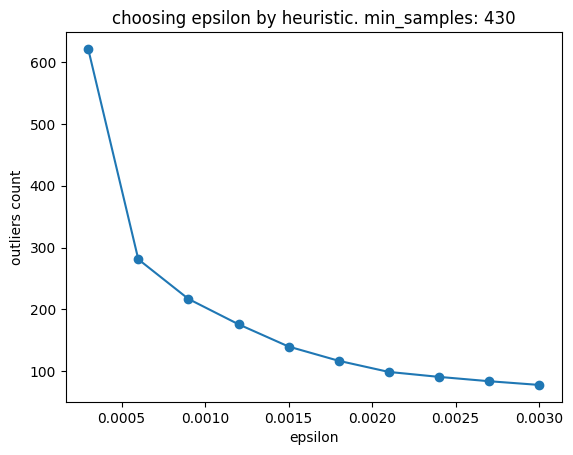

In [95]:
for min_samples in range(250,450,20): # 위에서 정한 min_samples 후보군
    outliers_count = {}
    for dist in range(3,33,3):
        dbscan = DBSCAN(eps=(dist/10000), min_samples=min_samples, metric='cosine')
        dbscan_labels = dbscan.fit_predict(data)
        # outlier 개수만큼 지우기.
        outliers = sum(dbscan_labels == -1) 
        outliers_count[dist/10000] = outliers
    epsilon = outliers_count.keys()
    count = outliers_count.values()

    plt.title(f"choosing epsilon by heuristic. min_samples: {min_samples}")    
    plt.xlabel("epsilon")
    plt.ylabel("outliers count")
    plt.plot(epsilon, count, 'o-')

    plt.show()

# min samples 후보: 8, 11, 14, 19, 23, 25
# 8의 경우, 0.009, 0.012
# 11

In [96]:
#outlier 제거
from sklearn.cluster import DBSCAN

# DBSCAN 객체 생성 및 학습 수행. 
dbscan = DBSCAN(eps=0.0009, min_samples=430, metric='cosine')
# 차원이 크기에 cosine 거리 사용

dbscan_labels = dbscan.fit_predict(data)

data['dbscan_cluster'] = dbscan_labels

# 이상치는 -1로 표기되며, 이를 이용해 DataFrame에서 이상치를 찾을 수 있습니다.
outliers_df = data[data['dbscan_cluster'] == -1]
print(len(outliers_df))

217


In [97]:
data[data["dbscan_cluster"] == 1]
data = data[data['dbscan_cluster'] != -1]
data = data.drop('dbscan_cluster', axis=1)

In [98]:
Y = data[['DW_WBT_pFT','fat','sex']]
X = data[['BMI', 'HE_wc', 'sex', 'N_EN', 'N_PROT', 'L_OUT_FQ', 
          'HE_ht', 'BO1_1', 'BO3_01', 'BS3_1']]

attribute_names = X.columns.tolist()

In [99]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 학습 데이터셋에 대해 스케일링 적용
X = scaler.fit_transform(X)

# 테스트 데이터셋에 대해 스케일링 적용
# X_test = scaler.transform(X_test)


In [100]:
def determine_fat(row):
    if row['sex'] == 1:
        if row['pred_DW_WBT_pFT'] < 24.8:
            return 0
        else:
            return 1
    else:
        if row['pred_DW_WBT_pFT'] < 36.49:
            return 0
        else:
            return 1

TEST SET, TRAIN SET분할

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

regressor = LinearRegression()
score= 0
fat_acc = 0

while (score < 0.74 or fat_acc < 0.795):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)   
    # Train the model
    regressor.fit(X_train, Y_train['DW_WBT_pFT'])
    
    # Apply the model to the test data
    y_pred = regressor.predict(X_test)
    pd.DataFrame(Y_test['DW_WBT_pFT']).to_csv('true.csv')
    score = regressor.score(X_test, Y_test["DW_WBT_pFT"])
    # Create 'new_fat' column in the training data
    Y_test['pred_DW_WBT_pFT'] = y_pred
    Y_test['new_fat'] = Y_test.apply(determine_fat, axis=1)
    pd.DataFrame(Y_test).to_csv('Y_pred')
    # Calculate the accuracy of 'fat'
    fat_acc = sum(Y_test['fat'] == Y_test['new_fat']) / len(Y_test)
    
    print("test score:", score)
    print("fat accuracy: ", fat_acc)
    
    # Create confusion matrix
    # y_true = Y_test['fat'].values
    # y_pred = Y_test['new_fat'].values
    # labels = np.unique(y_true)
    
    # cm = np.zeros((len(labels), len(labels)))
    # for i in range(len(y_true)):
    #     cm[y_true[i]][y_pred[i]] += 1
    
    # # sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=labels, yticklabels=labels)
    # # plt.xlabel('Predicted')
    # # plt.ylabel('True')
    # # plt.show()

test score: 0.721758357122937
fat accuracy:  0.7769970414201184
test score: 0.7275826773447731
fat accuracy:  0.775887573964497
test score: 0.727833225724468
fat accuracy:  0.7766272189349113
test score: 0.7143605090081293
fat accuracy:  0.7851331360946746
test score: 0.7218412873354976
fat accuracy:  0.7696005917159763
test score: 0.7362017607802327
fat accuracy:  0.7762573964497042
test score: 0.7123946631928452
fat accuracy:  0.7821745562130178
test score: 0.7267454458370015
fat accuracy:  0.7773668639053254
test score: 0.7257284924333567
fat accuracy:  0.7670118343195266
test score: 0.7199790378444901
fat accuracy:  0.7751479289940828
test score: 0.7330954909443242
fat accuracy:  0.7943786982248521
test score: 0.7325172753253435
fat accuracy:  0.7751479289940828
test score: 0.7218011352517634
fat accuracy:  0.768491124260355
test score: 0.7162320781857472
fat accuracy:  0.7736686390532544
test score: 0.7264529468652572
fat accuracy:  0.7795857988165681
test score: 0.724424768096072

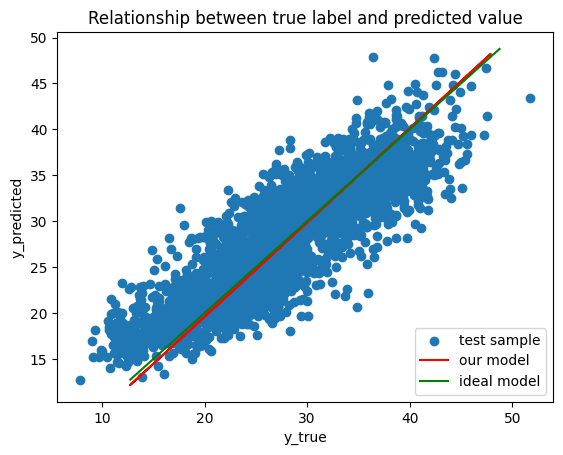

In [108]:
import matplotlib.pyplot as plt

y_pred = regressor.predict(X_test)
slope, intercept = np.polyfit(y_pred, Y_test['DW_WBT_pFT'], 1)
lower_lim = round(float(np.min(y_pred)), 2)
if lower_lim < -100:
    lower_lim = -100
upper_lim = round(float(np.max(y_pred)) + 1, 2)
if upper_lim > 100:
    upper_lim = 100
plt.title("Relationship between true label and predicted value")
plt.xlabel("y_true")
plt.ylabel("y_predicted")
plt.scatter(Y_test['DW_WBT_pFT'], y_pred, label='test sample')
plt.plot(y_pred, slope * y_pred + intercept, color='red', label="our model")
plt.plot(np.arange(lower_lim, upper_lim), np.arange(lower_lim, upper_lim), color='green', label="ideal model")
plt.legend(loc='lower right')
plt.show()

In [109]:
# attribute_names = X.columns.tolist()
coefficients = regressor.coef_

sorted_attributes = dict(zip(attribute_names, coefficients))
sorted_attributes = dict(sorted(sorted_attributes.items(), key=lambda item: abs(item[1]), reverse=True))

for key, value in sorted_attributes.items():
    print(f'{key}: {value}')
print("Bias term:", regressor.intercept_)

HE_wc: 23.073039443246852
BMI: 16.290429502709426
sex: 10.891945921754274
N_PROT: 3.949110208046055
N_EN: -3.6237350085678934
HE_ht: -2.7363156331004337
BO1_1: 2.1273414061934575
L_OUT_FQ: 0.9858126734500867
BO3_01: -0.7563558350213744
BS3_1: 0.3882179102695947
Bias term: 10.078301650415284


In [111]:
# Z-점수 계산

residual = y_pred - Y_test['DW_WBT_pFT']

print("residual of std:", residual.std())

# # 이상치로 판단할 임계값 설정 (일반적으로 3을 사용)
# threshold = 3

# # 이상치 탐지
# outliers = np.where(np.any(z_scores > threshold, axis=1))

# # 이상치가 있는 행의 인덱스 출력 (겹치는 행은 중복 제거)
# outlier_rows = np.unique(outliers[0])
# print("Rows with outliers:", len(outlier_rows))


residual of sigma: 3.9065804579670766
